## Описание задания

Предсказание: согласится ли клиент на депозит. Метрика ROC-AUC

### Описание столбцов

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-* employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)



# 1. Подгрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [3]:
#!pip install pygraphviz

In [2]:
import os

In [3]:
os.environ["PATH"] += os.pathsep + 'C:\Users\User\Anaconda2\Library\\bin\graphviz'

In [4]:
import graphviz

In [3]:
df_train = pd.read_csv('train.csv', encoding='utf8')
df_test = pd.read_csv('test.csv', encoding='utf8')

df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['target'] = 0
df = df_test.append(df_train, sort=False).reset_index(drop=True)

### Описание столбцов

* _id - идентификатор человека
* age - возраст
* job - тип работы ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-* employed","services","student","technician","unemployed","unknown")
* marital - семейное положение ("divorced" (разведенный и овдовевший),"married","single","unknown")
* education - уровень образования ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default - есть ли дефолт по кредиту ("no","yes","unknown")
* housing - есть ли кредит на жилье ("no","yes","unknown")
* loan - есть ли персональный кредит ("no","yes","unknown")
* contact - контактный тип связи ("cellular","telephone")
* month - последний контактный месяц года ("jan", "feb", "mar", ..., "nov", "dec")
* day_of_week - последний контактный день недели ("mon","tue","wed","thu","fri")
* duration - длительность последнего контакта в секундах. (Важное замечание: этот атрибут сильно влияет на таргет (например, если длительность - 0 сек., то таргет - 0). Тем не менее, продолжительность не известна до выполнения вызова.
* campaign - количество контактов, выполненных для этого клиента в рамках текущей маркетинговой кампании (включая последний контакт)
* pdays - количество дней прошедших последнего контакта с клиентом с предыдущей маркетинговой кампании (999 означает, что ранее с клиентом не контактировали)
* previous - количество контактов, выполненных до текущей маркетинговой кампании для этого клиента
* poutcome - результат предыдущей маркетинговой кампании ("failure","nonexistent","success")

#### ниже приведены показатели окружающей среды и банка
* emp.var.rate - изменение уровня занятости (квартальный показатель)
* cons.price.idx - индекс потребительских цен (ежемесячный показатель)
* cons.conf.idx - индекс доверия потребителя (ежемесячный показатель)
* euribor3m - курс Euribor (ежедневный показатель)
* nr.employed - количество сотрудников (квартальный показатель)
* target - целевая переменная (таргет) - согласился ли клиент на вклад (депозит)



 <a class="anchor" id="2"></a>
# 2. Анализ данных

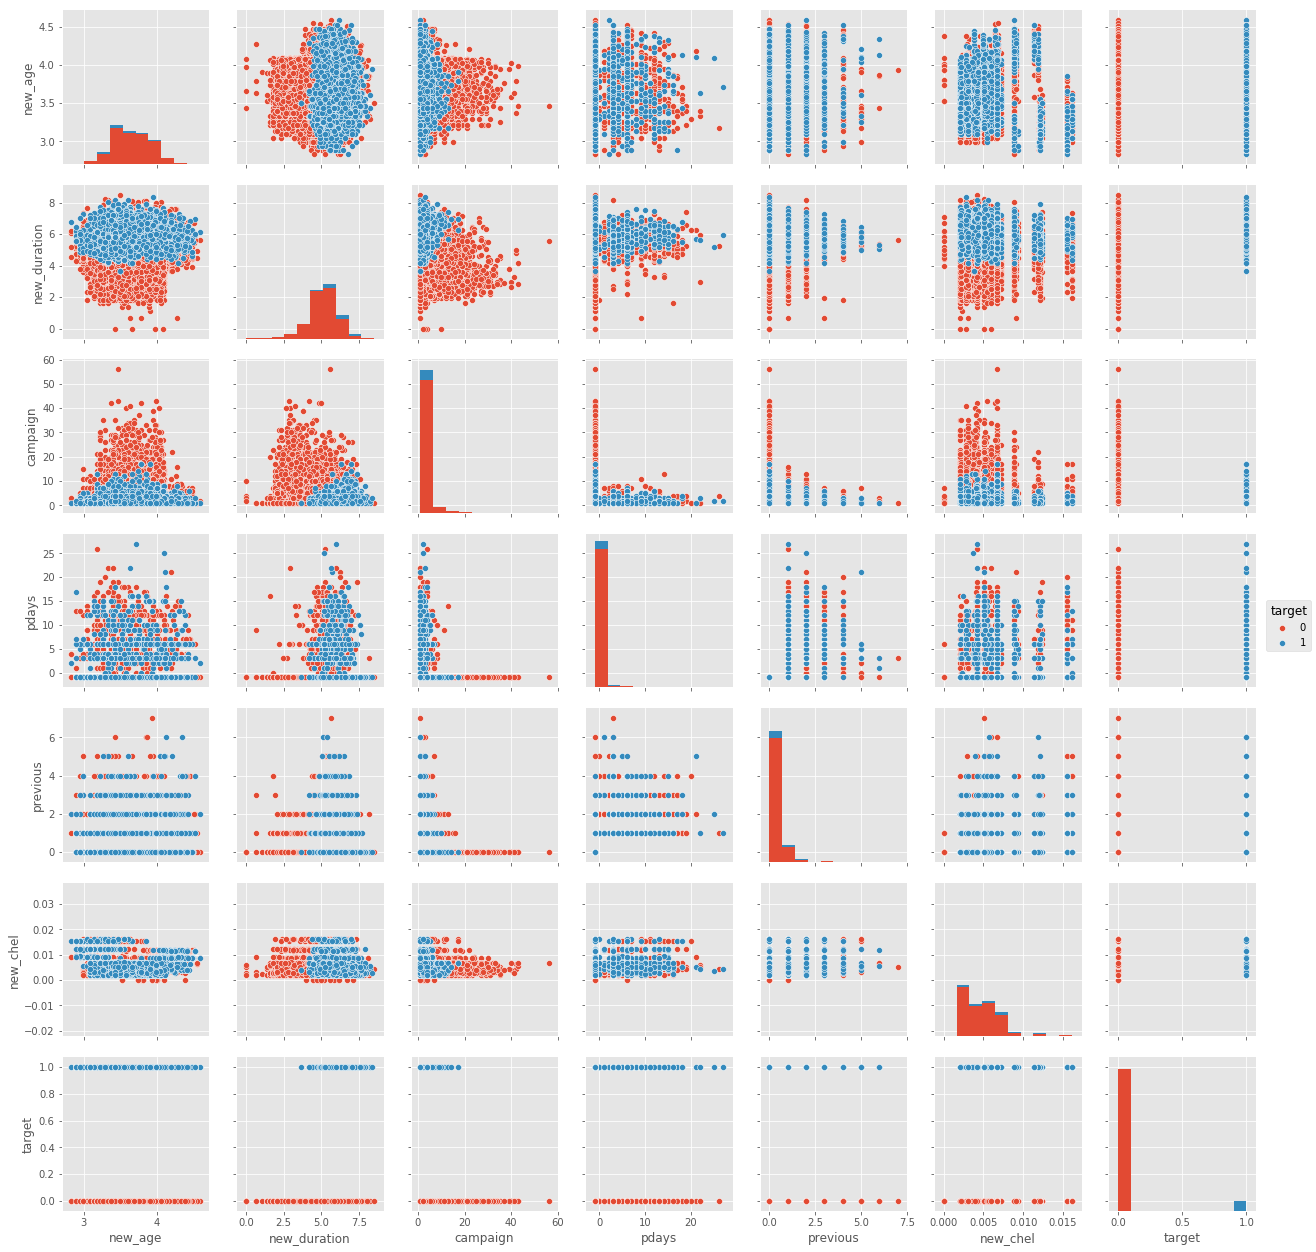

In [84]:
import seaborn as sns
sns.pairplot(df_preproc[['new_age','new_duration','campaign','pdays','previous','new_chel', 'target']],hue='target')

 <a class="anchor" id="3"></a>
# 3. Функция обработки данных

In [4]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output.drop('_id', axis = 1, inplace = True)
    df_output.loc[:,['pdays']] =df_output.loc[:,['pdays']].replace({999: -1})
    encoding_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output = pd.get_dummies(df_output, columns=encoding_columns,)     
    return df_output

In [5]:
def preproc_data1(df_input):
    df_output = df_input.copy()
    d = df_output.pivot_table('age', 'job', 'target', 'count')
    s=d.div(d.sum(1), axis='rows')
    df_output['new_job']=df_output['job'].map({'admin.': s[1][0] ,'blue-collar': s[1][1], 'entrepreneur': s[1][2],'housemaid': s[1][3],'management': s[1][4],'retired': s[1][5],'self-employed': s[1][6],'services': s[1][7],'student': s[1][8],'technician': s[1][9], 'unemployed': s[1][10], 'unknown': s[1][11]})
    d1 = df.pivot_table('age', 'education', 'target', 'count')
    s=d1.div(d1.sum(1), axis='rows')
    df_output['new_education']=df_output['education'].map({'basic.4y': s[1][0] ,'basic.6y': s[1][1], 'basic.9y': s[1][2],'high.school': s[1][3],'illiterate': 0,'professional.course': s[1][5],'university.degree': s[1][6],'unknown': s[1][7]})
    return df_output.drop(['job','education'],axis=1)
    

In [6]:
df_preproc1 = preproc_data1(df)
df_preproc1.columns
df_preproc=preproc_data(df_preproc1)

In [7]:
df_preproc['new_chel']=df_preproc['new_education']*df_preproc['new_job']

In [8]:
df_preproc.drop('new_education', axis = 1, inplace = True)

In [9]:
df_preproc.drop('new_job', axis = 1, inplace = True)

In [10]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=True)

In [52]:
df_preproc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,new_chel
0,57,371,1,-1,1,-1.8,92.893,-46.2,1.299,5099.1,...,0,0,1,0,0,0,1,0,0,0.004059
1,55,285,2,-1,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,1,0,0,0,1,0,0.004972
2,33,52,1,-1,1,-1.8,92.893,-46.2,1.313,5099.1,...,0,1,0,0,0,0,1,0,0,0.002037
3,36,355,4,-1,0,1.4,94.465,-41.8,4.967,5228.1,...,0,1,0,0,0,0,0,1,0,0.005050
4,27,189,2,-1,0,1.4,93.918,-42.7,4.963,5228.1,...,0,1,0,0,0,0,0,1,0,0.003852
5,58,605,1,-1,0,1.4,93.918,-42.7,4.962,5228.1,...,0,1,0,0,0,0,0,1,0,0.009128
6,48,243,1,-1,0,1.1,93.994,-36.4,4.856,5191.0,...,0,0,0,0,0,1,0,1,0,0.003038
7,51,24,7,-1,0,1.4,93.444,-36.1,4.962,5228.1,...,0,0,0,1,0,0,0,1,0,0.006746
8,24,126,4,-1,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,1,0,1,0,0.004273
9,36,43,4,-1,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,1,0,0,0,0,1,0,0.004162


In [12]:
import pandas as pd
import numpy as np
p=poly.fit(df_preproc.drop(['target','train_test'], axis=1))
b=p.get_feature_names(df_preproc.drop(['target','train_test'], axis=1).columns)
c=p.transform(df_preproc.drop(['target','train_test'], axis=1))
features = pd.DataFrame(c, columns=b)

In [13]:
features['target']=df_preproc['target']

In [14]:
features['train_test']=df_preproc['train_test']

In [79]:
features

,1,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_wed poutcome_success,day_of_week_wed new_chel,poutcome_failure poutcome_nonexistent,poutcome_failure poutcome_success,poutcome_failure new_chel,poutcome_nonexistent poutcome_success,poutcome_nonexistent new_chel,poutcome_success new_chel,target,train_test
0,1.0,57.0,371.0,1.0,-1.0,1.0,-1.8,92.893,-46.2,1.299,...,0.0,0.000000,0.0,0.0,0.004059,0.0,0.000000,0.000000,0,0
1,1.0,55.0,285.0,2.0,-1.0,0.0,1.1,93.994,-36.4,4.860,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.004972,0.000000,0,0
2,1.0,33.0,52.0,1.0,-1.0,1.0,-1.8,92.893,-46.2,1.313,...,0.0,0.000000,0.0,0.0,0.002037,0.0,0.000000,0.000000,0,0
3,1.0,36.0,355.0,4.0,-1.0,0.0,1.4,94.465,-41.8,4.967,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.005050,0.000000,0,0
4,1.0,27.0,189.0,2.0,-1.0,0.0,1.4,93.918,-42.7,4.963,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.003852,0.000000,0,0
5,1.0,58.0,605.0,1.0,-1.0,0.0,1.4,93.918,-42.7,4.962,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.009128,0.000000,0,0
6,1.0,48.0,243.0,1.0,-1.0,0.0,1.1,93.994,-36.4,4.856,...,0.0,0.003038,0.0,0.0,0.000000,0.0,0.003038,0.000000,0,0
7,1.0,51.0,24.0,7.0,-1.0,0.0,1.4,93.444,-36.1,4.962,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.006746,0.000000,0,0
8,1.0,24.0,126.0,4.0,-1.0,0.0,1.4,94.465,-41.8,4.962,...,0.0,0.004273,0.0,0.0,0.000000,0.0,0.004273,0.000000,0,0
9,1.0,36.0,43.0,4.0,-1.0,0.0,1.4,93.918,-42.7,4.962,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.004162,0.000000,0,0


In [15]:
df_preproc=features

In [16]:
df_preproc['new_age']=np.log(df_preproc['age'])
df_preproc.drop('age', axis = 1, inplace = True)
df_preproc['new_duration']=np.log(df_preproc['duration']+1)
df_preproc.drop('duration', axis = 1, inplace = True)
df_preproc['new_chel']=np.log(df_preproc['new_chel']+1)


 <a class="anchor" id="4"></a>
# 4. ML

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV

In [18]:
df_train_preproc = df_preproc.query('train_test == 1').drop(['train_test'], axis=1)
df_test_preproc = df_preproc.query('train_test == 0').drop(['train_test'], axis=1)

y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

In [19]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17298, 991), (17298L,), (7414, 991), (7414L,))

### 4.3 LogisticRegression

In [24]:
%%time
lr=LogisticRegression(random_state=42,)
lr_cv = cross_val_score(lr, X_scaled, y_train, scoring='roc_auc', cv = skf, )
print('Logreg CV mean: ', lr_cv.mean())
print('Logreg CV std: ', lr_cv.std()) 

('Logreg CV mean: ', 0.9234011485324932)
('Logreg CV std: ', 0.0008864745811403158)
Wall time: 1min 30s


In [97]:
#Grid search cross validation
grid={"C":[0.3,0.1,0.25],
     "penalty":["l1"],
     } 

logreg_cv=GridSearchCV(LogisticRegression(random_state=42)
                       ,grid, cv=skf, scoring='roc_auc')

%time logreg_cv.fit(X_train,y_train) 

Wall time: 2min 30s


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1'], 'C': [0.3, 0.1, 0.25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [98]:
print('Best Score#:', logreg_cv.best_score_)
print('Best Penalty:', logreg_cv.best_estimator_.get_params()['penalty'])
print('Best C:', logreg_cv.best_estimator_.get_params()['C'])

('Best Score#:', 0.9378232358318983)
('Best Penalty:', 'l1')
('Best C:', 0.25)


In [25]:
lr = LogisticRegression(C=0.1,
                        penalty='l2',
                        random_state=42, fit_intercept=True, )

lr_cv = cross_val_score(lr, X_scaled, y_train, scoring='roc_auc', cv = skf, )
print('Logreg CV mean: ', lr_cv.mean())
print('Logreg CV std: ', lr_cv.std())

('Logreg CV mean: ', 0.9284923139021962)
('Logreg CV std: ', 0.0008202665398915431)


In [26]:
lr.fit(X_scaled, y_train)
lr_predict = lr.predict(X_scaled_test)
lr_predict_proba = lr.predict_proba(X_scaled_test)
print('Logreg Test' )
print('roc_auc: ', '\t', roc_auc_score(y_test, lr_predict_proba[:,1]))
print('accuracy: ', '\t', accuracy_score(y_test, lr_predict))
print('precision: ', '\t', precision_score(y_test, lr_predict))
print('recall: ', '\t', recall_score(y_test, lr_predict))

Logreg Test
('roc_auc: ', '\t', 0.9383047081491286)
('accuracy: ', '\t', 0.9112489884003238)
('precision: ', '\t', 0.648)
('recall: ', '\t', 0.4804270462633452)


### Итоговая модель:


In [ ]:
lr_cv = cross_val_score(lr, X, y, scoring='roc_auc', cv = skf, )
print('Logreg CV mean: ', lr_cv.mean())
print('Logreg CV std: ', lr_cv.std()) 


 <a class="anchor" id="6"></a>
## 6. Готовим  df_test и отправляем на Kaggle

### 6.1. Подгружаем  df_test и делаем разбиение

In [27]:
df_test = pd.read_csv('test.csv', encoding='utf8')

In [28]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [30]:
y = df_train_preproc.target.values
X = df_train_preproc.drop(['target'], axis=1)

X_test_submission = df_test_preproc.drop(['target'], axis=1)

X_test_submission.shape, X.shape, y.shape

((16476, 991), (24712, 991), (24712L,))

In [31]:
scaler.fit(X)
X_scaled = scaler.transform(X)  
X_scaled_test = scaler.transform(X_test_submission)

### 6.2. Обучаем модель и сохраняем предикты

In [29]:
lr

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# На всякий случай проверяем по CV еще раз
lr_cv=cross_val_score(lr, X, y, scoring='roc_auc', cv = 10, )
print('Logreg CV mean: ', lr_cv.mean())
print('Logreg CV std: ', lr_cv.std()) 

Logreg CV mean:  0.9324688669566317
Logreg CV std:  0.007168068384044582


In [32]:
lr.fit(X_scaled, y)
lr_predict_proba = lr.predict_proba(X_scaled_test)

In [33]:
submission = pd.DataFrame(columns=['_id', 'predicted'],)
submission['_id'], submission['predicted'] = df_test._id.values, lr_predict_proba[:,1]

In [34]:
submission.head(10)

,_id,predicted
0,66810d8e6bf2b41c880a7bc6c8a1e295,0.139437
1,ccac3879652b08cb8b44c1920fd93afa,0.010908
2,fcccab4d7a76f70647f015f2c84c2af8,0.000521
3,ed8399278c30678dab739045fa12b440,0.049947
4,1d4d62ac5cabcb48bac7112813f290cb,0.011022
5,aba2dec4c5cab88824f36babd24b986f,0.173553
6,06f318f1dd178e738f675bb88a5adb84,0.006976
7,d5036f5956e42ee6207296238fc4bc1d,0.000069
8,fe0cc8933698ad4046ff2b82f65756eb,0.002500
9,70190122f4ebf196535e11b33eb95b81,0.000404


In [35]:
df_test.shape, submission.shape

((16476, 21), (16476, 2))

In [36]:
submission.to_csv('submission.csv', index=False)